# Implementation of Gradient Descent algorithm for Linear Regression

## Problem Statement

When petrol is pumped into tanks, hydrocarbons escape. To evaluate the effectiveness of pollution controls, experiments were performed. The quantity of hydrocarbons escaping was measured as a function of the following variables:

- The tank temperature
- The temperature of the petrol pumped in,
- The initial pressure in the tank, and 
- The pressure of the petrol pumped in.

## Dataset description

There are 32 rows of data. The data include 6 columns. 

- The first column is **the index**, 
- The second column is **the tank temperature** (in $^oF$), 
- The third column is **the petrol temperature** (in $^oF$), 
- The fourth column is **the initial tank pressure** (in $lbs\ in^{-2}$), 
- The fifth column is the **the petrol pressure** (in $lbs\ in^{-2}$), and 
- The last column is the **amount of escaping hydrocarbons** (in $grams$).

## Python coding

In [2]:
import numpy as np
import pandas as pd

### Importing the dataset

In [35]:
data = pd.read_csv('height_weight_gender_Kung_San.csv')

In [36]:
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### Preprocessing the dataset

#### Taking features and target variables

In [39]:
X = data.iloc[:,:3].values
y = data.iloc[:,3].values

print(X.shape, y.shape)

X

(544, 3) (544,)


array([[151.765    ,  47.8256065,  63.       ],
       [139.7      ,  36.4858065,  63.       ],
       [136.525    ,  31.864838 ,  65.       ],
       ...,
       [156.21     ,  54.0624965,  21.       ],
       [ 71.12     ,   8.051258 ,   0.       ],
       [158.75     ,  52.5316235,  68.       ]])

In [11]:
y

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

#### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)
X

array([[ 0.48958811,  0.83063275,  1.62369327],
       [ 0.05208689,  0.05951381,  1.62369327],
       [-0.06304501, -0.25471715,  1.72018199],
       ...,
       [ 0.65077277,  1.25474816, -0.40256994],
       [-2.43476214, -1.87406692, -1.41570154],
       [ 0.74287829,  1.15064711,  1.86491508]])

In [43]:
np.mean(X, axis = 0)

array([ 0.00000000e+00,  1.30614473e-17, -1.30614473e-16])

In [44]:
np.std(X, axis = 0)

array([1., 1., 1.])

#### Train-test split of the dataset

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, 
                                                    random_state = 40)

In [46]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(408, 3) (408,) (136, 3) (136,)


### Implementing the cost-function

#### Equation of the cost function for linear regression (Mean Square Error Cost function)

$$ J(\hat{\Theta}) = \frac{1}{2m} \sum_{i=1}^{m} \left(y^{(i)} - \hat{y}^{(i)} \right)^2 = \frac{1}{2m} \sum_{i=1}^{m} \left(y^{(i)} - \hat{\theta}_0 - \sum_{j=1}^{k} \left( \hat{\theta}_j~x_j^{(i)}\right) \right)^2$$

In [47]:
# Here the cost function takes two arguments
    # A numpy 1-D array "y_true" for the true values of the target variable
    # A numpy 1-D array "y_pred" for the predicted values of the target variable
    
# It return a scalar "mean squared error cost function"

def mse_cost(y_true, y_pred):
    
    assert (y_true.shape[0] == y_pred.shape[0]),"Dimension Mismatch"
    
    m = y_true.shape[0]
    J = np.sum(np.square(y_true - y_pred))/(2*m)
    return (J)

### Implementing Gradient Descent Algorithm

#### Implementing the function to calculate the predicted output

In [48]:
def output_lin_reg(X, theta):
    
    return (X @ theta)

#### Equation of gradient descent update rule for linear regression

$$ \hat{\theta}_j(t+1) := \hat{\theta}_j(t) - \frac{\alpha}{m} \sum_{i=1}^{m} \left(\hat{\theta}_0(t) + \sum_{j=1}^{k} \left( \hat{\theta}_j(t)~x_j^{(i)}\right) - y^{(i)} \right) x_j^{(i)}~~; ~j=0,1,2,...,k ~~\&~~ x_0^{(i)} = 1~~for~~i = 1,2,...,m $$

$$ \hat{\theta}_j(t+1) := \hat{\theta}_j(t) - \frac{\alpha}{m} \sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}~~; ~j=0,1,2,...,k ~~\&~~ x_0^{(i)} = 1~~for~~i = 1,2,...,m $$

In [49]:
def grad_des_lin_reg(X, y, alpha = 0.01, it = 1000, tol = 0.0001):
    
    assert (X.shape[0] == y.shape[0]), "Dimension Mismatch"
    
    m = X.shape[0]   # Number of training samples
    X = np.c_[np.ones(m),X] # Inserting a column of all ones 
    k = X.shape[1]   # number of predictors (including the dummy predictor)
    
    np.random.seed(32)
    theta = np.random.randn(k) # Initializing the model parameters with random values
    
    costs = []
    count = 0
    
    for i in range(it):
        y_pred = output_lin_reg (X, theta)
        J = mse_cost(y, y_pred)
        costs.append(J)
        del_theta = (-1)*(alpha/m)*(X.T @ (y_pred - y))
        theta += del_theta
        if np.linalg.norm(del_theta) <= tol:
            break
        count += 1
    
    return theta, costs, count
    

### Running gradient descent algorithm

In [50]:
theta, costs, count = grad_des_lin_reg(X_train, y_train, alpha = 0.1, it = 8000, tol = 0.0001)

In [51]:
print("theta: {}, \n number of iterations = {}".format(theta, count))

theta: [ 0.46772581  0.03087159  0.10082216 -0.10120665], 
 number of iterations = 516


### Plotting cost vs iterations

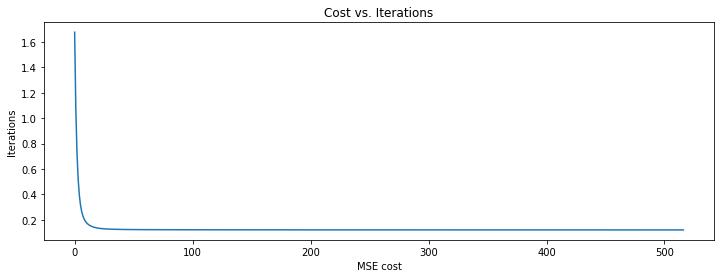

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,4))
plt.plot(costs)
plt.title("Cost vs. Iterations")
plt.xlabel("MSE cost")
plt.ylabel("Iterations")
plt.show()

### Predicting the model output on test dataset

In [54]:
y_pred_test = output_lin_reg(np.c_[np.ones(X_test.shape[0]),X_test], theta)

In [55]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,1.0,0.626422
1,1.0,0.475205
2,0.0,0.485311
3,1.0,0.462495
4,0.0,0.395639
...,...,...
131,0.0,0.472322
132,0.0,0.467046
133,1.0,0.545730
134,0.0,0.347313


In [56]:
mse_cost(y_test, y_pred_test)

0.11834404944355054

### Solving Linear Regression by Normal Equation

In [57]:
X_t = np.c_[np.ones(X_train.shape[0]), X_train]

theta_normal = (np.linalg.pinv(X_t.T @ X_t))@X_t.T@y_train

In [58]:
theta_normal

array([ 0.46781917,  0.01897517,  0.11279147, -0.10115634])

In [59]:
theta

array([ 0.46772581,  0.03087159,  0.10082216, -0.10120665])

In [60]:
y_pred_test = output_lin_reg(np.c_[np.ones(X_test.shape[0]),X_test], theta_normal)

In [61]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,1.0,0.632520
1,1.0,0.472216
2,0.0,0.480034
3,1.0,0.454779
4,0.0,0.396594
...,...,...
131,0.0,0.471457
132,0.0,0.460676
133,1.0,0.546638
134,0.0,0.352709


In [62]:
mse_cost(y_test, y_pred_test)

0.11823090965224188

### Solving Linear Regression by in-built function python library Scikit-Learn (sklearn)

In [63]:
from sklearn.linear_model import LinearRegression 

In [64]:
model = LinearRegression().fit(X_train, y_train)

In [65]:
model.coef_

array([ 0.01897517,  0.11279147, -0.10115634])

In [66]:
model.intercept_

0.4678191712098024

In [67]:
y_pred_test = model.predict(X_test)

In [68]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,1.0,0.632520
1,1.0,0.472216
2,0.0,0.480034
3,1.0,0.454779
4,0.0,0.396594
...,...,...
131,0.0,0.471457
132,0.0,0.460676
133,1.0,0.546638
134,0.0,0.352709


In [69]:
mse_cost(y_test, y_pred_test)

0.11823090965224188